In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'E:\迅雷下载\92eb1f1b\mlclass-ex1-jin10.23\ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data2 = (data2 - data2.mean()) / data2.std() #减去均值，除以方差
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [5]:
def computeCost(X,y,theta):
    inner = np.power((X*theta.T)-y,2)
    return np.sum(inner/(2*len(X)))

In [6]:
cols = data2.shape[1]
#抽出X和y
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

#把X和y转换成np模式
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))


In [7]:
#梯度下降
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))#构造临时的0值矩阵
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters) #构建数组，存放每次迭代后的cost值
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])#计算两矩阵
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term)) #更新θ
        
        theta = temp
        cost [i] = computeCost(X,y,theta)
        
        
    return theta,cost

In [8]:
alpha = 0.01 #学习率
iters = 1000 #迭代次数

In [9]:
g, cost = gradientDescent(X,y,theta,alpha,iters)
computeCost(X,y,g)

0.13070336960771892

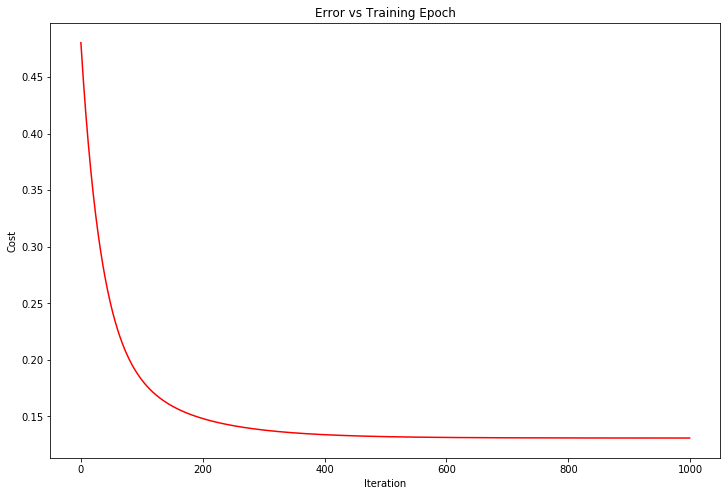

In [11]:
fix, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()